<a href="https://colab.research.google.com/github/JorgeCruz02/Tarea_Arq/blob/main/Notebooks/GENERAL/23-09-29-Adquisicion-ver01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Archivos JSON**

JSON (JavaScript Object Notation) es un formato. Se utiliza comúnmente para transmitir datos entre un servidor y un cliente, como en aplicaciones web y servicios web, debido a su simplicidad y facilidad de uso. JSON se basa en una sintaxis de pares clave-valor y se utiliza para representar datos estructurados.

## Ejemplo:

    {
      "nombre": "Juan Pérez",
      "edad": 30,
      "ciudad": "Ciudad de México"
    }

### Tambien pueden tener cadenas de datos como valor

## Ejemplo:
    {
                "appType": 1,
                "timeZone": "-0500",
                "startTime": 1570576620000,
                "deviceCode": 109097206,
                "endTime": 1570580400000,
                "type": 7,
                "samplePoints": [
                    {
                        "unit": "0",
                        "startTime": 1570580340000,
                        "endTime": 1570580400000,
                        "value": "85.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570579920000,
                        "endTime": 1570579980000,
                        "value": "67.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570579740000,
                        "endTime": 1570579800000,
                        "value": "65.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570579560000,
                        "endTime": 1570579620000,
                        "value": "59.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570579440000,
                        "endTime": 1570579500000,
                        "value": "63.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570579320000,
                        "endTime": 1570579380000,
                        "value": "65.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570579260000,
                        "endTime": 1570579320000,
                        "value": "60.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    },
                    {
                        "unit": "0",
                        "startTime": 1570576620000,
                        "endTime": 1570576680000,
                        "value": "88.0",
                        "key": "DATA_POINT_DYNAMIC_HEARTRATE"
                    }
                ],
                "version": 1570580430092
    }


## Leemos el archivo JSON

Hay 2 formas de leer el archivo:



1.   pd.read_json()
2.   json.load()



In [ ]:
import pandas as pd

data = pd.read_json('/content/drive/MyDrive/Health/health detail data.json')
data

,healthData,deviceCode,source,recordDay,type,version
0,"[{'appType': 1, 'timeZone': '-0500', 'startTim...",109097206,1,20191008,7,1570660265901
1,"[{'appType': 1, 'timeZone': '-0500', 'startTim...",109097206,1,20191009,7,1570793447843
2,"[{'appType': 1, 'timeZone': '-0500', 'startTim...",109097206,1,20191010,7,1570793447120
3,"[{'appType': 1, 'timeZone': '-0500', 'startTim...",109097206,1,20191011,7,1570889105390
4,"[{'appType': 1, 'timeZone': '-0500', 'startTim...",109097206,1,20191012,7,1571003005203
...,...,...,...,...,...,...
154,"[{'appType': 1, 'timeZone': '-0600', 'startTim...",109097206,1,20200101,9,1577970138243
155,"[{'appType': 1, 'timeZone': '-0600', 'startTim...",109097206,1,20200103,9,1578145330105
156,"[{'appType': 1, 'timeZone': '-0600', 'startTim...",109097206,1,20200104,9,1578145329534
157,"[{'appType': 1, 'timeZone': '-0600', 'startTim...",109097206,1,20200106,9,1578397953042


In [ ]:
import json
import pandas as pd

with open('/content/drive/MyDrive/Health/health detail data.json') as archivo_json:
    datos_json = json.load(archivo_json)

datos_json


# **Usando la Herramineta JSON Crack**


Se encuentra en internet o como extencio en Visual Studio Code

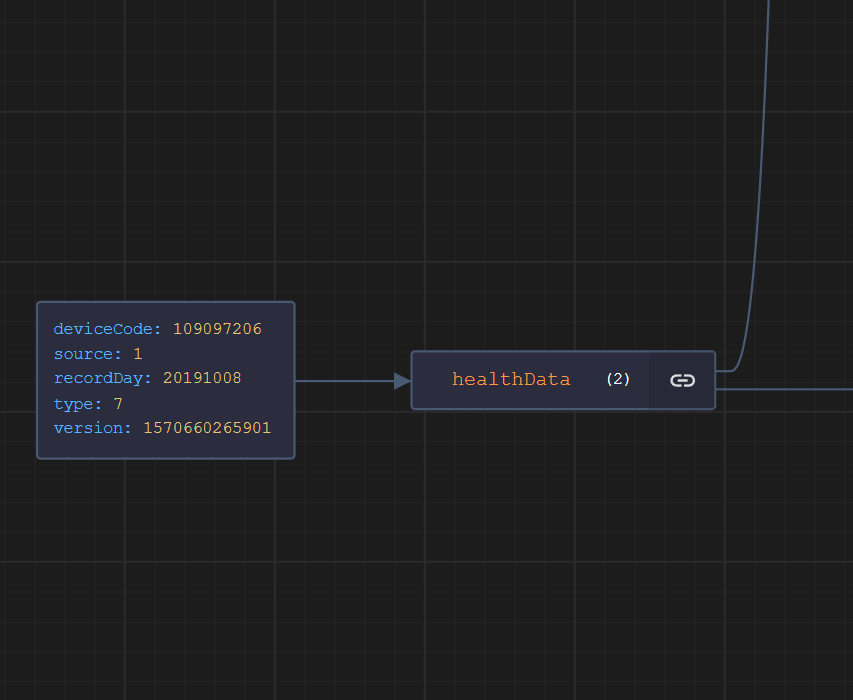

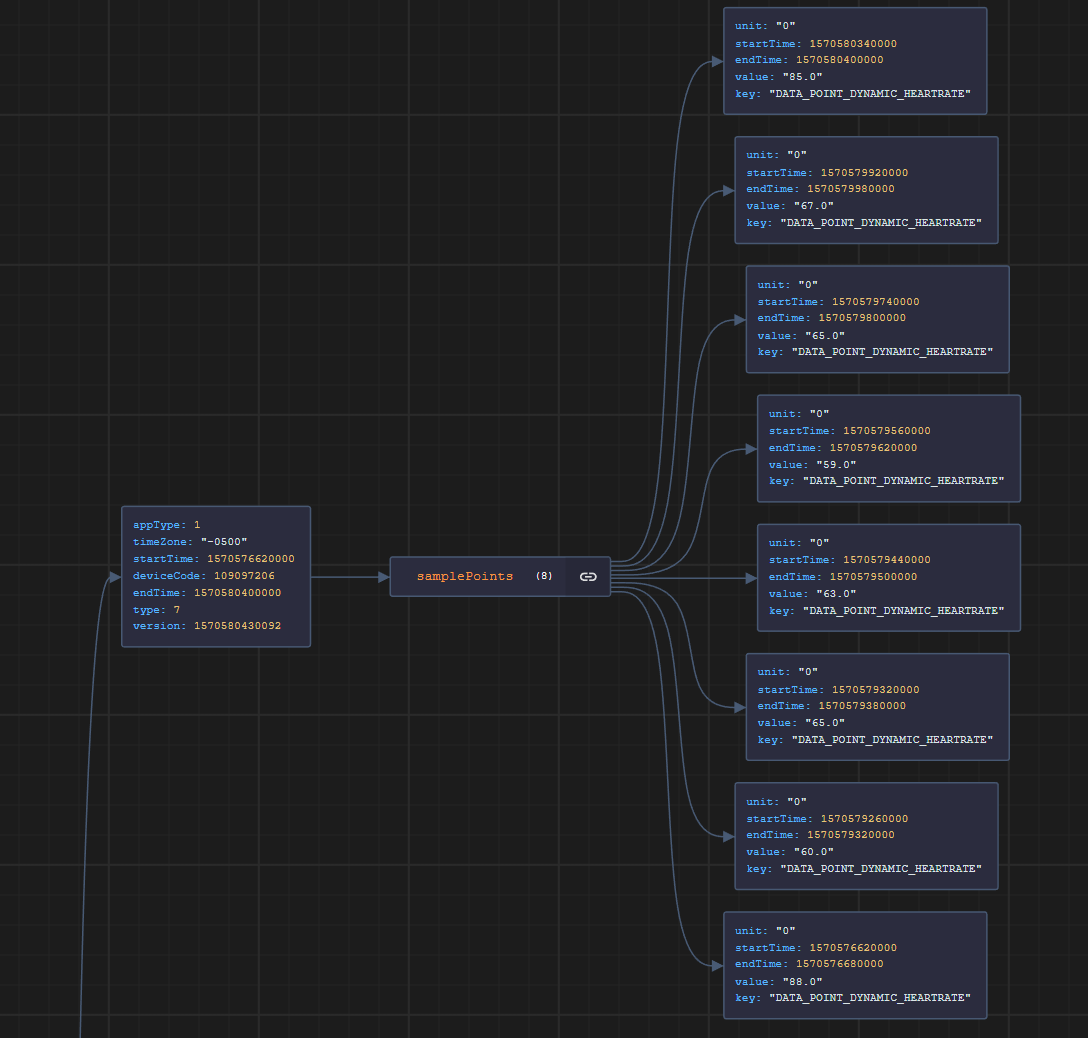

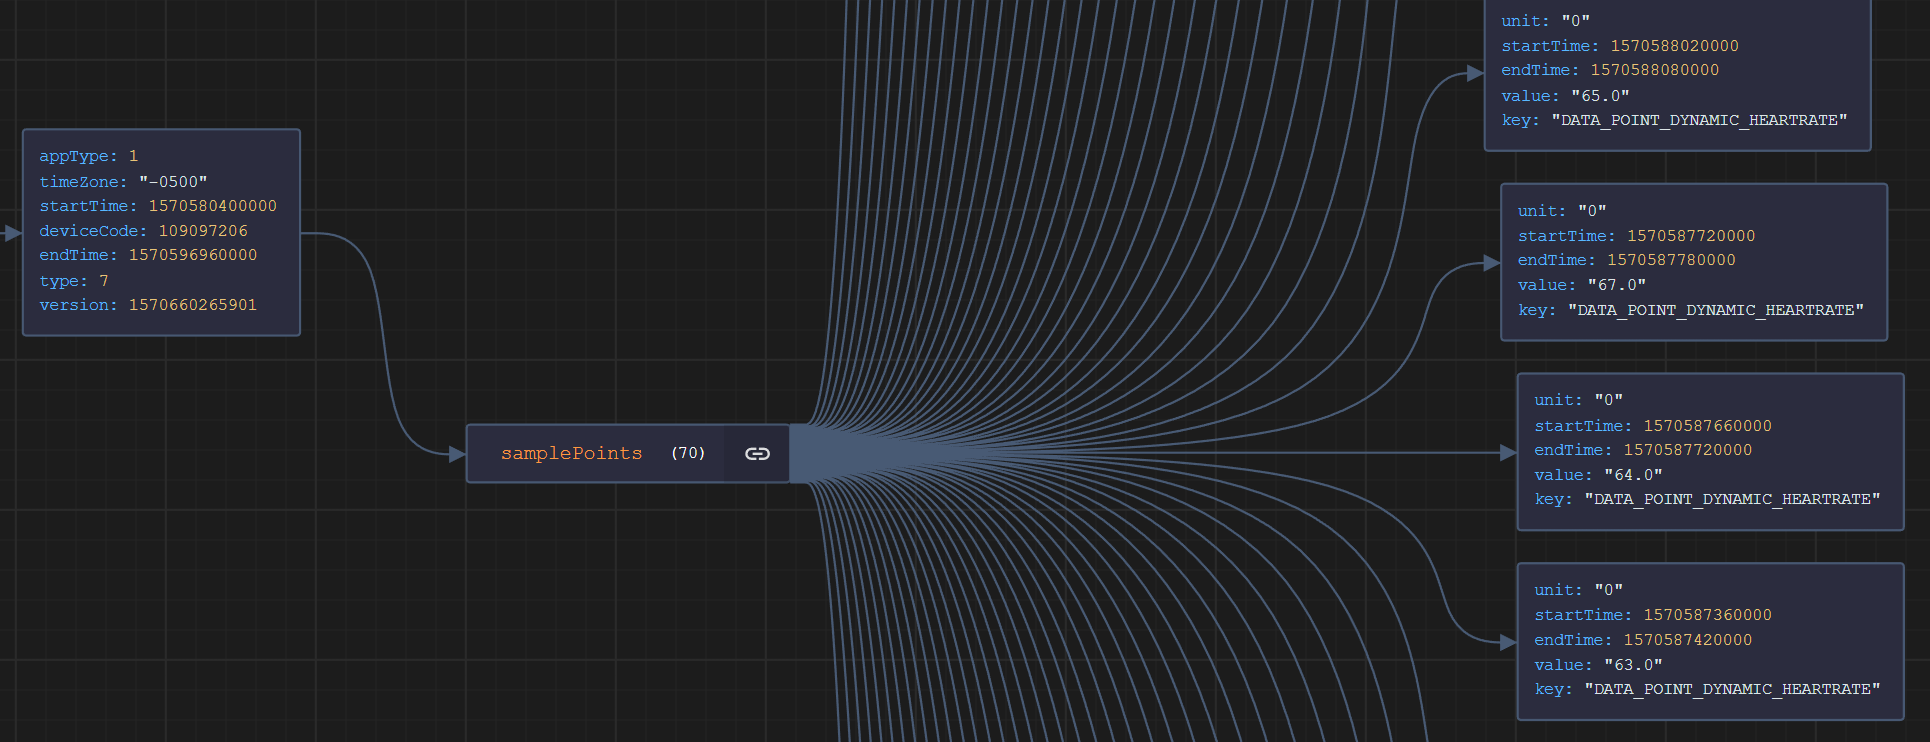

**Funciones para convertir un archivo JSON a un Data Frame pd.json_normalize()**


los campos que necesita llevar son:


1.   El archivo JSON abierto
2.   record_path: que  seria la columna la cual no esta normalizada.
3.   record_prefix: que sirve para agregar prefijos y sea mas legible la informacion o para evitar que 2 columnas tengan el mismo nombre.
4.   meta: sirve para agregar las demas columnas del archivo original.
5.   max_level: esta sirve para normalizar unicamente una columna una o varias veces pero dejando unicamente los datos de la ultima iteracion.

In [ ]:
dataf_clean = pd.json_normalize(datos_json, record_path='healthData', record_prefix='HD_',
                             meta=['deviceCode', 'source', 'recordDay', 'type', 'version'], )
dataf_clean.head(5)

,HD_appType,HD_timeZone,HD_startTime,HD_deviceCode,HD_endTime,HD_type,HD_samplePoints,HD_version,deviceCode,source,recordDay,type,version
0,1,-0500,1570576620000,109097206,1570580400000,7,"[{'unit': '0', 'startTime': 1570580340000, 'en...",1570580430092,109097206,1,20191008,7,1570660265901
1,1,-0500,1570580400000,109097206,1570596960000,7,"[{'unit': '0', 'startTime': 1570596900000, 'en...",1570660265901,109097206,1,20191008,7,1570660265901
2,1,-0500,1570662540000,109097206,1570683300000,7,"[{'unit': '0', 'startTime': 1570683240000, 'en...",1570793447120,109097206,1,20191009,7,1570793447843
3,1,-0500,1570597440000,109097206,1570648560000,7,"[{'unit': '0', 'startTime': 1570648500000, 'en...",1570660265187,109097206,1,20191009,7,1570793447843
4,1,-0500,1570649100000,109097206,1570662540000,7,"[{'unit': '0', 'startTime': 1570662480000, 'en...",1570793447843,109097206,1,20191009,7,1570793447843


In [ ]:
dataf_clean2 = pd.json_normalize(json.loads(dataf_clean.to_json(orient='records')), record_path='HD_samplePoints', record_prefix='HD_SP_',
                                    meta=['HD_appType', 'HD_timeZone', 'HD_startTime', 'HD_deviceCode', 'HD_endTime', 'HD_type', 'HD_version', 'deviceCode', 'source', 'recordDay', 'type', 'version'], )
dataf_clean2.head(5)

,HD_SP_unit,HD_SP_startTime,HD_SP_endTime,HD_SP_value,HD_SP_key,HD_appType,HD_timeZone,HD_startTime,HD_deviceCode,HD_endTime,HD_type,HD_version,deviceCode,source,recordDay,type,version
0,0,1570580340000,1570580400000,85.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,20191008,7,1570660265901
1,0,1570579920000,1570579980000,67.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,20191008,7,1570660265901
2,0,1570579740000,1570579800000,65.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,20191008,7,1570660265901
3,0,1570579560000,1570579620000,59.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,20191008,7,1570660265901
4,0,1570579440000,1570579500000,63.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,20191008,7,1570660265901


Convertimos todos los datos de tiempo a unos mas legibles

In [ ]:
dataf_clean2['recordDay'] = pd.to_datetime(dataf_clean2['recordDay'], format='%Y%m%d')

dataf_clean2.head(5)

,HD_SP_unit,HD_SP_startTime,HD_SP_endTime,HD_SP_value,HD_SP_key,HD_appType,HD_timeZone,HD_startTime,HD_deviceCode,HD_endTime,HD_type,HD_version,deviceCode,source,recordDay,type,version
0,0,1570580340000,1570580400000,85.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,2019-10-08,7,1570660265901
1,0,1570579920000,1570579980000,67.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,2019-10-08,7,1570660265901
2,0,1570579740000,1570579800000,65.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,2019-10-08,7,1570660265901
3,0,1570579560000,1570579620000,59.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,2019-10-08,7,1570660265901
4,0,1570579440000,1570579500000,63.0,DATA_POINT_DYNAMIC_HEARTRATE,1,-0500,1570576620000,109097206,1570580400000,7,1570580430092,109097206,1,2019-10-08,7,1570660265901
